<a href="https://colab.research.google.com/github/pushp2566/git-session-23/blob/main/pushpaaaa__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split



In [10]:
from __future__ import with_statement
with_mask_files=os.listdir('/content/data/with_mask')
without_mask_files=os.listdir('/content/data/without_mask')
print(with_mask_files)

['with_mask_3310.jpg', 'with_mask_2294.jpg', 'with_mask_2790.jpg', 'with_mask_1926.jpg', 'with_mask_1152.jpg', 'with_mask_2671.jpg', 'with_mask_2647.jpg', 'with_mask_510.jpg', 'with_mask_1308.jpg', 'with_mask_1717.jpg', 'with_mask_697.jpg', 'with_mask_3384.jpg', 'with_mask_1810.jpg', 'with_mask_3144.jpg', 'with_mask_2654.jpg', 'with_mask_300.jpg', 'with_mask_2602.jpg', 'with_mask_1128.jpg', 'with_mask_964.jpg', 'with_mask_2658.jpg', 'with_mask_1271.jpg', 'with_mask_2916.jpg', 'with_mask_2700.jpg', 'with_mask_3104.jpg', 'with_mask_1547.jpg', 'with_mask_2350.jpg', 'with_mask_2251.jpg', 'with_mask_1511.jpg', 'with_mask_653.jpg', 'with_mask_3375.jpg', 'with_mask_1666.jpg', 'with_mask_1038.jpg', 'with_mask_1996.jpg', 'with_mask_820.jpg', 'with_mask_658.jpg', 'with_mask_1048.jpg', 'with_mask_490.jpg', 'with_mask_799.jpg', 'with_mask_2203.jpg', 'with_mask_3573.jpg', 'with_mask_1043.jpg', 'with_mask_931.jpg', 'with_mask_3712.jpg', 'with_mask_1176.jpg', 'with_mask_912.jpg', 'with_mask_879.jpg',

In [11]:
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [12]:
labels=with_mask_labels+without_mask_labels

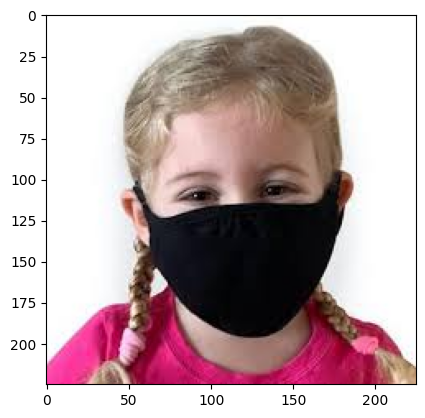

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_2648.jpg')
plt.imshow(img)

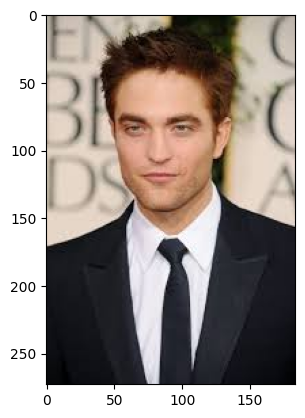

In [21]:
img = mpimg.imread('/content/data/without_mask/without_mask_2648.jpg')
plt.imshow(img)

In [14]:
with_mask_path='/content/data/with_mask/'

data=[]
for x in with_mask_files:
  img_path=with_mask_path+x
  image =Image.open(img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
without_mask_path='/content/data/without_mask/'


for x in without_mask_files:
  img_path=without_mask_path+x
  image =Image.open(img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [16]:
x= np.array(data)
y=np.array(labels)
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train= x_train/255
x_test= x_test/255

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))



model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))


In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
h=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 12s 24ms/step - loss: 0.5763 - accuracy: 0.8104 - val_loss: 0.5609 - val_accuracy: 0.8893
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.3277 - accuracy: 0.8714 - val_loss: 0.4870 - val_accuracy: 0.7124
Epoch 3/10
170/170 [==============================] - 3s 20ms/step - loss: 0.2763 - accuracy: 0.8854 - val_loss: 0.2545 - val_accuracy: 0.9074
Epoch 4/10
170/170 [==============================] - 3s 19ms/step - loss: 0.2450 - accuracy: 0.9060 - val_loss: 0.2247 - val_accuracy: 0.9339
Epoch 5/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1979 - accuracy: 0.9253 - val_loss: 0.1518 - val_accuracy: 0.9405
Epoch 6/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1796 - accuracy: 0.9329 - val_loss: 0.1662 - val_accuracy: 0.9388
Epoch 7/10
170/170 [==============================] - 3s 20ms/step - loss: 0.1415 - accuracy: 0.9509 - val_loss: 0.1449 - val_accuracy: 0.942